# Analysis of Tips Dataset from Seaborn

This notebook analyzes the "tips" dataset from Seaborn, which contains information about tips received by a waiter over a period of a few months.

## 1. Import Libraries and Load Data

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
#from statsmodels.stats.proportion import proportions_ztest
#from statsmodels.stats.descriptivestats import sign_test
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
df = sns.load_dataset('tips')

## 2. Data Description and Overview

In [50]:
# Print a section header to indicate this section shows dataset overview
print("=== DATASET OVERVIEW ===")

# The `shape` attribute in pandas DataFrame returns a tuple representing the dimensions of the DataFrame. 
# The first element of the tuple is the number of rows (observations) in the DataFrame, and the second element is the number of columns (variables) 
# in the DataFrame.
# Print the number of observations (rows) in the dataset using string formatting
print(f"Sample size: {df.shape[0]} observations")

# Print the number of variables (columns) in the dataset using string formatting
print(f"Number of variables: {df.shape[1]}")

# Print a newline character followed by a label for the next output section
# The backslash n (\n) creates a blank line for better readability
print("\nFirst 10 rows:")

# Display the first 10 rows of the DataFrame in a formatted table
# The head(10) method returns the first 10 rows of the DataFrame
# display() function provides a nicely formatted output in Jupyter notebooks
display(df.head(10))

# Print a newline character followed by a label for dataset information section
print("\nDataset info:")

# Call the info() method on the DataFrame to display concise summary information
# This shows: column names, non-null counts, data types, and memory usage
# It helps understand the structure and data types of each column in the dataset
df.info()

=== DATASET OVERVIEW ===
Sample size: 244 observations
Number of variables: 7

First 10 rows:


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [51]:
# Print a section header to indicate this section describes the variables in the dataset
# The backslash n (\n) creates a blank line above for better visual separation from previous output
print("\n=== VARIABLE DESCRIPTION ===")

# Print description for the first variable: total_bill
# This is a continuous numerical variable measured in dollars, representing the total bill amount before tip
print("1. total_bill: Continuous numerical (dollars) - The total bill amount")

# Print description for the second variable: tip
# This is a continuous numerical variable measured in dollars, representing the tip amount given to the waiter
print("2. tip: Continuous numerical (dollars) - The tip amount")

# Print description for the third variable: sex
# This is a categorical nominal variable with two categories (Male, Female)
# Nominal means the categories have no inherent order or ranking
# It represents the gender of the person who paid the bill
print("3. sex: Categorical nominal (Male, Female) - Gender of bill payer")

# Print description for the fourth variable: smoker
# This is a categorical nominal variable with two categories (Yes, No)
# It indicates whether the dining party included any smokers
print("4. smoker: Categorical nominal (Yes, No) - Whether party included smokers")

# Print description for the fifth variable: day
# This is a categorical ordinal variable with four categories (Thur, Fri, Sat, Sun)
# Ordinal means the categories have a natural order (days of the week in chronological order)
# It represents which day of the week the transaction occurred
print("5. day: Categorical ordinal (Thur, Fri, Sat, Sun) - Day of the week")

# Print description for the sixth variable: time
# This is a categorical nominal variable with two categories (Lunch, Dinner)
# It indicates whether the meal occurred during lunch or dinner time
print("6. time: Categorical nominal (Lunch, Dinner) - Meal time")

# Print description for the seventh variable: size
# This is a discrete numerical variable that can take integer values from 1 to 6
# Discrete means the values are whole numbers (cannot have 2.5 people)
# It represents the number of people in the dining party
print("7. size: Discrete numerical (1-6) - Number of people in party")

# Print a newline character followed by a label for the basic statistics section
# This prepares the viewer for the statistical summary that follows
print("\nBasic statistics:")

# Display comprehensive descriptive statistics for all columns in the DataFrame
# The describe() method with include='all' parameter generates statistics for both numerical and categorical columns
# For numerical columns: count, mean, std, min, 25%, 50%, 75%, max
# For categorical columns: count, unique, top (mode), frequency
# display() function renders the output in a nicely formatted table in Jupyter notebooks
display(df.describe(include='all'))


=== VARIABLE DESCRIPTION ===
1. total_bill: Continuous numerical (dollars) - The total bill amount
2. tip: Continuous numerical (dollars) - The tip amount
3. sex: Categorical nominal (Male, Female) - Gender of bill payer
4. smoker: Categorical nominal (Yes, No) - Whether party included smokers
5. day: Categorical ordinal (Thur, Fri, Sat, Sun) - Day of the week
6. time: Categorical nominal (Lunch, Dinner) - Meal time
7. size: Discrete numerical (1-6) - Number of people in party

Basic statistics:


,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


## 3. Univariate Analysis

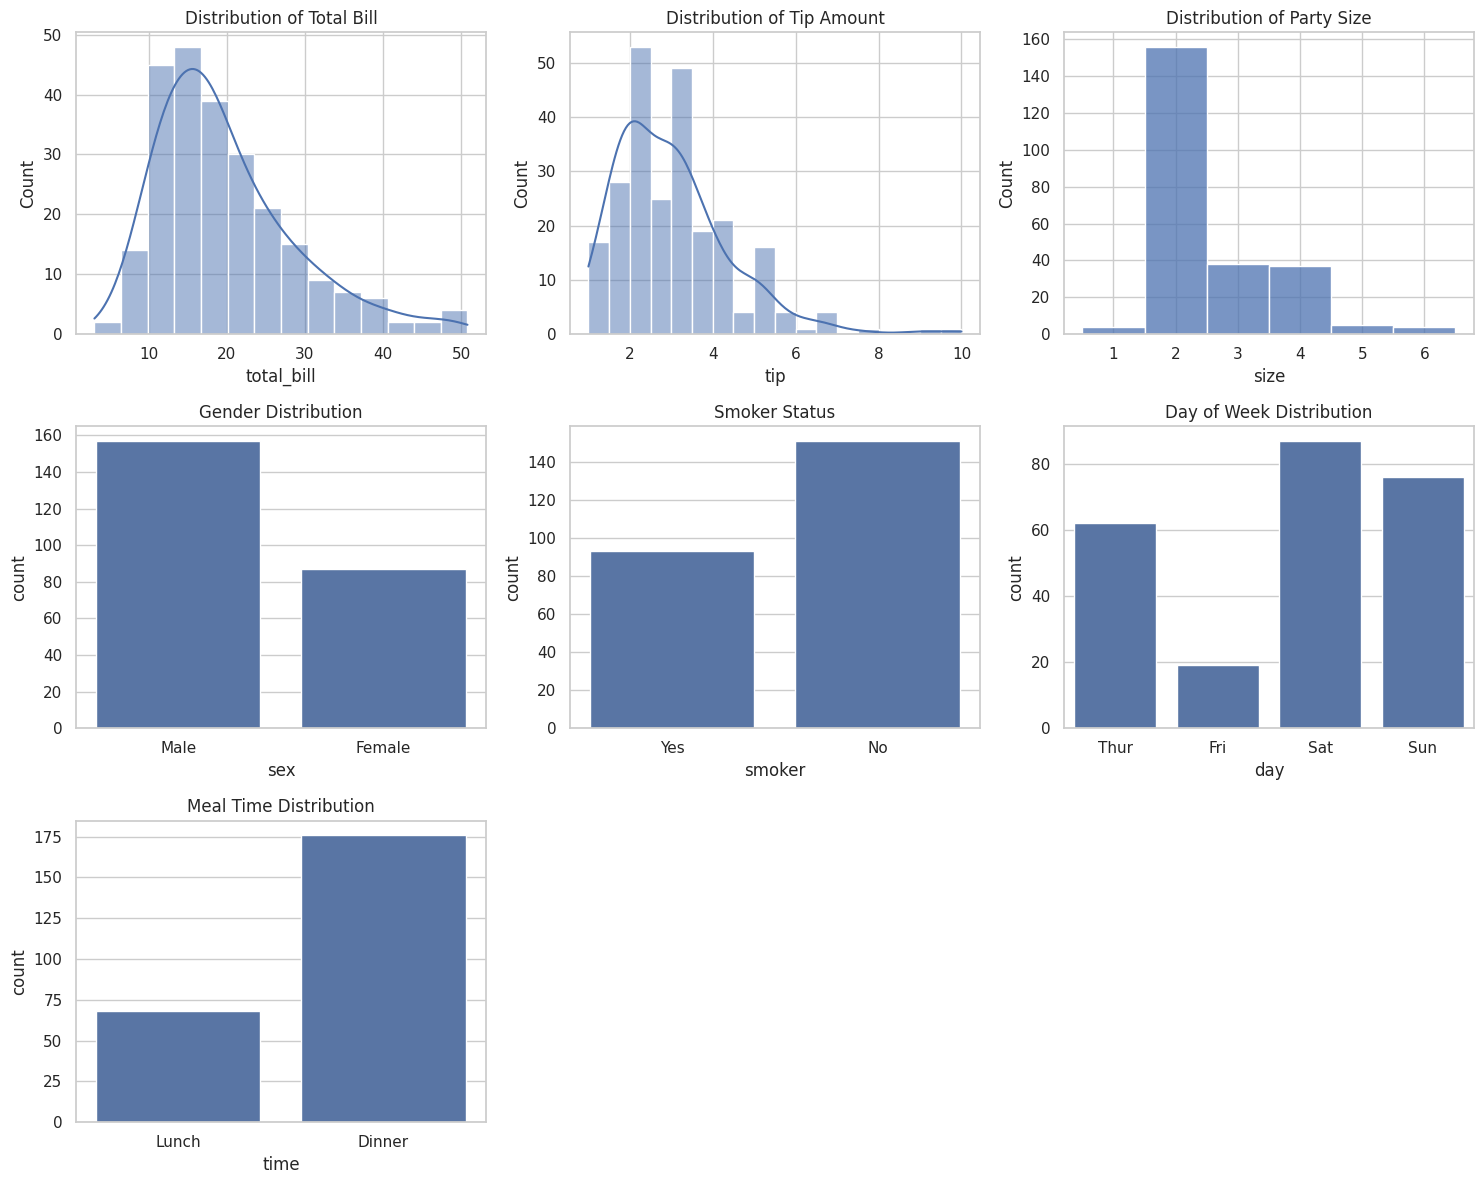

In [ ]:
# Create a figure with multiple subplots for univariate analysis
# plt.subplots(3, 3) creates a 3x3 grid of subplots (3 rows, 3 columns)
# figsize=(15, 12) sets the overall figure size to 15 inches wide by 12 inches tall
# 'fig' represents the entire figure, 'axes' is a 3x3 array of individual plot axes
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# --- NUMERICAL VARIABLES - HISTOGRAMS ---

# Create a histogram for 'total_bill' variable in the first subplot (row 0, column 0)
# sns.histplot creates a histogram that shows the distribution of a numerical variable
# data=df specifies the DataFrame to use
# x='total_bill' specifies which column to plot on the x-axis
# ax=axes[0,0] specifies which subplot to use (first row, first column)
# kde=True adds a Kernel Density Estimate line to smooth the distribution
sns.histplot(data=df, x='total_bill', ax=axes[0,0], kde=True)
# Set the title for the first subplot to describe what's being shown
axes[0,0].set_title('Distribution of Total Bill')

# Create a histogram for 'tip' variable in the second subplot (row 0, column 1)
# Similar to above but for the tip amount variable
# kde=True adds the smooth density curve to help visualize the distribution shape
sns.histplot(data=df, x='tip', ax=axes[0,1], kde=True)
# Set the title for the second subplot
axes[0,1].set_title('Distribution of Tip Amount')

# Create a histogram for 'size' variable in the third subplot (row 0, column 2)
# discrete=True is used because 'size' represents discrete values (whole numbers for party size)
# This ensures the histogram bars are centered on integer values
sns.histplot(data=df, x='size', ax=axes[0,2], discrete=True)
# Set the title for the third subplot
axes[0,2].set_title('Distribution of Party Size')

# --- CATEGORICAL VARIABLES - COUNT PLOTS ---

# Create a count plot for 'sex' variable in the fourth subplot (row 1, column 0)
# sns.countplot creates a bar plot showing the count of observations in each category
# data=df specifies the DataFrame to use
# x='sex' specifies the categorical variable to plot on the x-axis
# ax=axes[1,0] specifies which subplot to use (second row, first column)
sns.countplot(data=df, x='sex', ax=axes[1,0])
# Set the title for the fourth subplot
axes[1,0].set_title('Gender Distribution')

# Create a count plot for 'smoker' variable in the fifth subplot (row 1, column 1)
# Shows the distribution of smoking vs non-smoking parties
sns.countplot(data=df, x='smoker', ax=axes[1,1])
# Set the title for the fifth subplot
axes[1,1].set_title('Smoker Status')

# Create a count plot for 'day' variable in the sixth subplot (row 1, column 2)
# order=['Thur','Fri','Sat','Sun'] ensures days are displayed in chronological order
# This is important for ordinal categorical variables to maintain logical sequence
sns.countplot(data=df, x='day', ax=axes[1,2], order=['Thur','Fri','Sat','Sun'])
# Set the title for the sixth subplot
axes[1,2].set_title('Day of Week Distribution')

# Create a count plot for 'time' variable in the seventh subplot (row 2, column 0)
# Shows the distribution of lunch vs dinner meals
sns.countplot(data=df, x='time', ax=axes[2,0])
# Set the title for the seventh subplot
axes[2,0].set_title('Meal Time Distribution')

# --- CLEAN UP EMPTY SUBPLOTS ---

# Hide the eighth subplot (row 2, column 1) since we don't need it
# set_visible(False) makes the empty subplot invisible, cleaning up the layout
axes[2,1].set_visible(False)

# Hide the ninth subplot (row 2, column 2) since we don't need it
# This removes the last empty subplot from our 3x3 grid
axes[2,2].set_visible(False)

# Adjust the spacing between subplots to prevent overlapping labels and titles
# plt.tight_layout() automatically adjusts padding between subplots for better readability
plt.tight_layout()
tight_layout
# Display the complete figure with all subplots
# plt.show() renders the figure and displays it in the notebook/output
plt.show()

### Interpretation of Univariate Plots:
- **total_bill**: Right-skewed distribution with most bills between $10-$25
- **tip**: Right-skewed distribution with most tips between $2-$4
- **size**: Discrete distribution with mode at 2 people (most common party size)
- **sex**: More male bill payers than female
- **smoker**: Slightly more non-smoking parties
- **day**: Saturday is busiest day, Friday is quietest
- **time**: Dinner is much more popular than lunch

## 4. Summary Statistics for Numerical Variables

In [53]:
# Print a section header to indicate this section shows summary statistics for numerical variables
print("=== SUMMARY STATISTICS FOR NUMERICAL VARIABLES ===")

# --- ANALYSIS FOR TOTAL_BILL VARIABLE ---

# Print a subheader for the total_bill variable analysis
# The backslash n (\n) creates a blank line for better separation from previous output
print("\nTotal Bill:")

# Calculate descriptive statistics for the 'total_bill' column using describe() method
# describe() returns a Series with count, mean, std, min, 25th percentile, median (50th), 75th percentile, and max
# Store these statistics in total_bill_stats variable for easy access
total_bill_stats = df['total_bill'].describe()

# Print the median (50th percentile) of total_bill with dollar formatting to 2 decimal places
# Median is the middle value when data is sorted, robust to outliers
# Include explanation that median is a robust measure of center
print(f"Median: ${total_bill_stats['50%']:.2f} (robust measure of center)")

# Calculate and print the Interquartile Range (IQR) for total_bill
# IQR = Q3 (75th percentile) - Q1 (25th percentile)
# IQR represents the middle 50% of the data and is robust to outliers
# Include explanation that IQR is a robust measure of spread
print(f"IQR: ${total_bill_stats['75%'] - total_bill_stats['25%']:.2f} (robust measure of spread)")

# Print the mean (average) of total_bill with dollar formatting to 2 decimal places
# Mean is the arithmetic average, sensitive to extreme values
print(f"Mean: ${total_bill_stats['mean']:.2f}")

# Print the standard deviation of total_bill with dollar formatting to 2 decimal places
# Standard deviation measures the typical deviation from the mean
print(f"Std: ${total_bill_stats['std']:.2f}")

# Print the statistical justification for using median and IQR instead of mean and standard deviation
# Explanation: Right-skewed distributions have outliers that pull the mean upward, making median more representative
print("Justification: Using median and IQR due to right-skewed distribution")

# --- ANALYSIS FOR TIP VARIABLE ---

# Print a subheader for the tip variable analysis
print("\nTip Amount:")

# Calculate descriptive statistics for the 'tip' column using describe() method
# Store these statistics in tip_stats variable for easy access
tip_stats = df['tip'].describe()

# Print the median (50th percentile) of tip amount with dollar formatting
# Median is less affected by extremely high tips that would skew the mean
print(f"Median: ${tip_stats['50%']:.2f} (robust measure of center)")

# Calculate and print the Interquartile Range (IQR) for tip amount
# IQR shows the range of typical tip amounts (middle 50%)
print(f"IQR: ${tip_stats['75%'] - tip_stats['25%']:.2f} (robust measure of spread)")

# Print the mean (average) tip amount with dollar formatting
# Mean can be influenced by unusually large tips
print(f"Mean: ${tip_stats['mean']:.2f}")

# Print the standard deviation of tip amount with dollar formatting
# Shows how much variation exists in tip amounts
print(f"Std: ${tip_stats['std']:.2f}")

# Print the statistical justification for using median and IQR
# Tip data is typically right-skewed with most people giving modest tips and a few giving very large tips
print("Justification: Using median and IQR due to right-skewed distribution")

# --- ANALYSIS FOR SIZE VARIABLE ---

# Print a subheader for the size variable analysis
print("\nParty Size:")

# Calculate descriptive statistics for the 'size' column using describe() method
# Store these statistics in size_stats variable for easy access
size_stats = df['size'].describe()

# Calculate and print the mode (most frequent value) of party size
# df['size'].mode() returns a Series of mode values (can be multiple if ties)
# .values[0] gets the first (most common) mode value
# Mode is most appropriate for discrete, categorical-like numerical data
print(f"Mode: {df['size'].mode().values[0]} (most appropriate for discrete data)")

# Print the mean (average) party size formatted to 2 decimal places
# While mean can be calculated, it may not be as meaningful for discrete data
print(f"Mean: {size_stats['mean']:.2f}")

# Print the standard deviation of party size formatted to 2 decimal places
# Shows variation in party sizes
print(f"Std: {size_stats['std']:.2f}")

# Print the statistical justification for using mode as the primary measure
# Party size is discrete (whole numbers only) and behaves more like categorical data
# Mode tells us the most common party size, which is often more useful than mean for this type of data
print("Justification: Mode is most appropriate for discrete categorical-like data")

=== SUMMARY STATISTICS FOR NUMERICAL VARIABLES ===

Total Bill:
Median: $17.80 (robust measure of center)
IQR: $10.78 (robust measure of spread)
Mean: $19.79
Std: $8.90
Justification: Using median and IQR due to right-skewed distribution

Tip Amount:
Median: $2.90 (robust measure of center)
IQR: $1.56 (robust measure of spread)
Mean: $3.00
Std: $1.38
Justification: Using median and IQR due to right-skewed distribution

Party Size:
Mode: 2 (most appropriate for discrete data)
Mean: 2.57
Std: 0.95
Justification: Mode is most appropriate for discrete categorical-like data


## 5. Bivariate Analysis

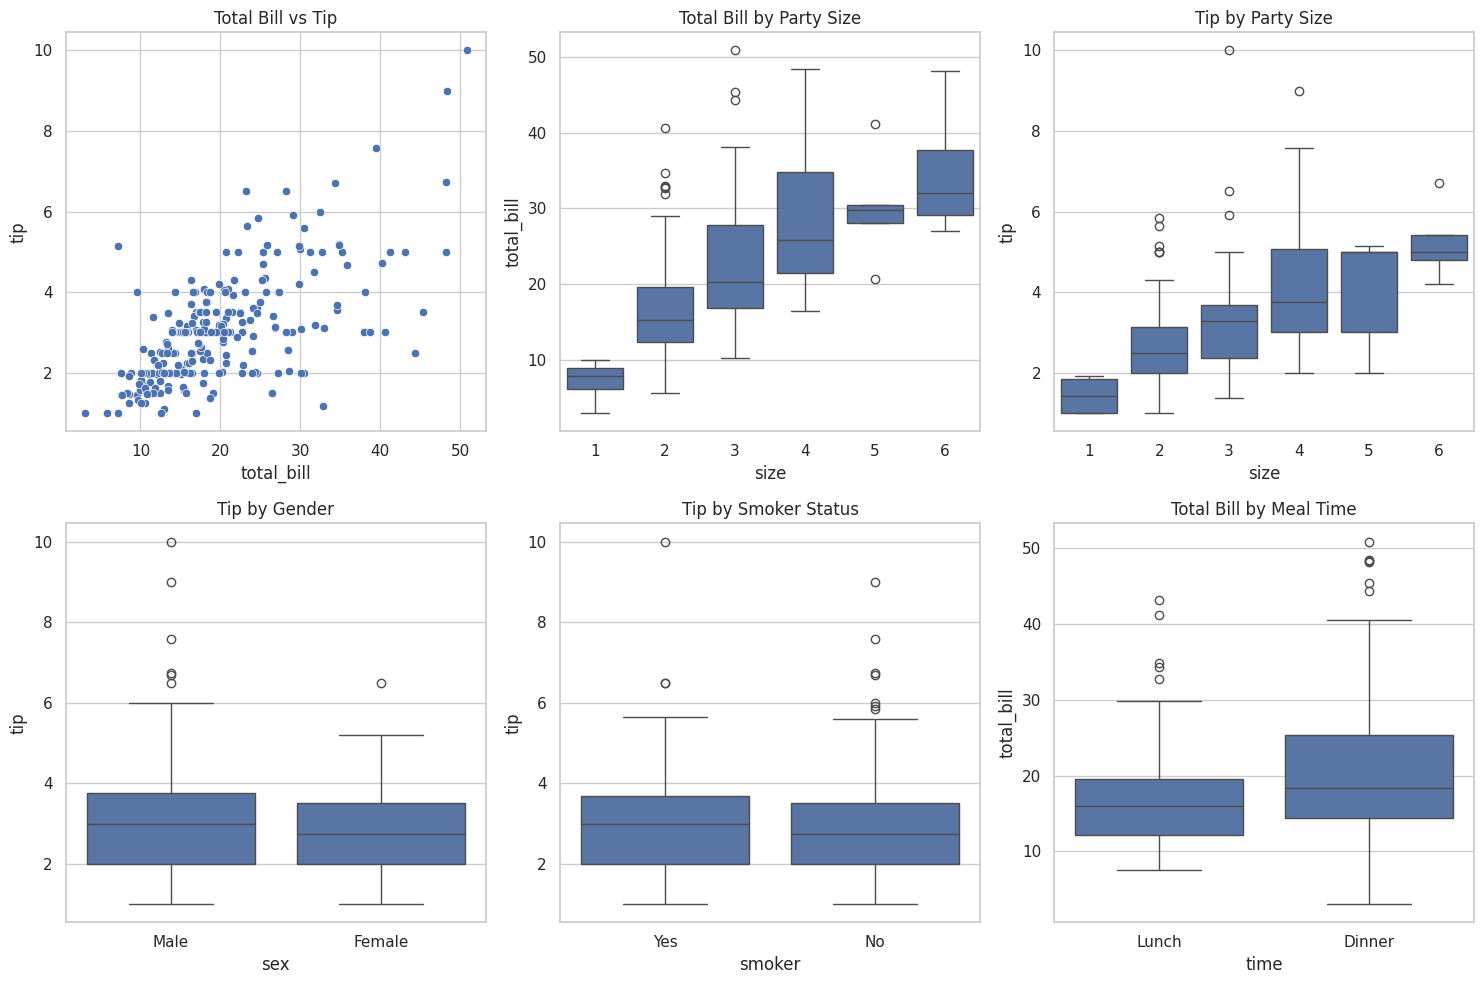

In [54]:
# Create a figure with multiple subplots for bivariate analysis (analyzing relationships between two variables)
# plt.subplots(2, 3) creates a 2x3 grid of subplots (2 rows, 3 columns)
# figsize=(15, 10) sets the overall figure size to 15 inches wide by 10 inches tall
# 'fig' represents the entire figure, 'axes' is a 2x3 array of individual plot axes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# --- NUMERICAL VS NUMERICAL VARIABLE PLOTS ---

# Create a scatter plot in the first subplot (row 0, column 0) to show relationship between two numerical variables
# sns.scatterplot creates points for each observation, showing how two continuous variables relate
# data=df specifies the DataFrame to use
# x='total_bill' sets the total bill amount as the independent variable on x-axis
# y='tip' sets the tip amount as the dependent variable on y-axis
# ax=axes[0,0] specifies which subplot to use (first row, first column)
sns.scatterplot(data=df, x='total_bill', y='tip', ax=axes[0,0])
# Set the title for the first subplot to describe the relationship being shown
axes[0,0].set_title('Total Bill vs Tip')

# Create a box plot in the second subplot (row 0, column 1) to compare total bill across different party sizes
# sns.boxplot shows distribution of a numerical variable across categories using quartiles
# data=df specifies the DataFrame to use
# x='size' sets the categorical variable (party size) on x-axis
# y='total_bill' sets the numerical variable (total bill) on y-axis
# ax=axes[0,1] specifies which subplot to use (first row, second column)
# Box plots show median, quartiles, and potential outliers for each category
sns.boxplot(data=df, x='size', y='total_bill', ax=axes[0,1])
# Set the title for the second subplot
axes[0,1].set_title('Total Bill by Party Size')

# Create a box plot in the third subplot (row 0, column 2) to compare tip amounts across different party sizes
# Similar to previous box plot but examining tip amounts instead of total bills
# This helps understand how tipping behavior varies with party size
sns.boxplot(data=df, x='size', y='tip', ax=axes[0,2])
# Set the title for the third subplot
axes[0,2].set_title('Tip by Party Size')

# --- CATEGORICAL VS NUMERICAL VARIABLE PLOTS ---

# Create a box plot in the fourth subplot (row 1, column 0) to compare tip amounts between genders
# sns.boxplot with categorical x variable and numerical y variable
# x='sex' sets the categorical variable (gender) on x-axis
# y='tip' sets the numerical variable (tip amount) on y-axis
# ax=axes[1,0] specifies which subplot to use (second row, first column)
# This helps identify if there are differences in tipping behavior between males and females
sns.boxplot(data=df, x='sex', y='tip', ax=axes[1,0])
# Set the title for the fourth subplot
axes[1,0].set_title('Tip by Gender')

# Create a box plot in the fifth subplot (row 1, column 1) to compare tip amounts between smoking and non-smoking parties
# x='smoker' sets the categorical variable (smoker status) on x-axis
# y='tip' sets the numerical variable (tip amount) on y-axis
# ax=axes[1,1] specifies which subplot to use (second row, second column)
# This examines whether smoking status influences tipping behavior
sns.boxplot(data=df, x='smoker', y='tip', ax=axes[1,1])
# Set the title for the fifth subplot
axes[1,1].set_title('Tip by Smoker Status')

# Create a box plot in the sixth subplot (row 1, column 2) to compare total bills between lunch and dinner
# x='time' sets the categorical variable (meal time) on x-axis
# y='total_bill' sets the numerical variable (total bill) on y-axis
# ax=axes[1,2] specifies which subplot to use (second row, third column)
# This analyzes whether meal time (lunch vs dinner) affects the total bill amount
sns.boxplot(data=df, x='time', y='total_bill', ax=axes[1,2])
# Set the title for the sixth subplot
axes[1,2].set_title('Total Bill by Meal Time')

# Adjust the spacing between subplots to prevent overlapping labels, titles, and plot elements
# plt.tight_layout() automatically calculates optimal padding between subplots for clean presentation
plt.tight_layout()

# Display the complete figure with all six bivariate analysis plots
# plt.show() renders the figure and displays it in the notebook/output
plt.show()

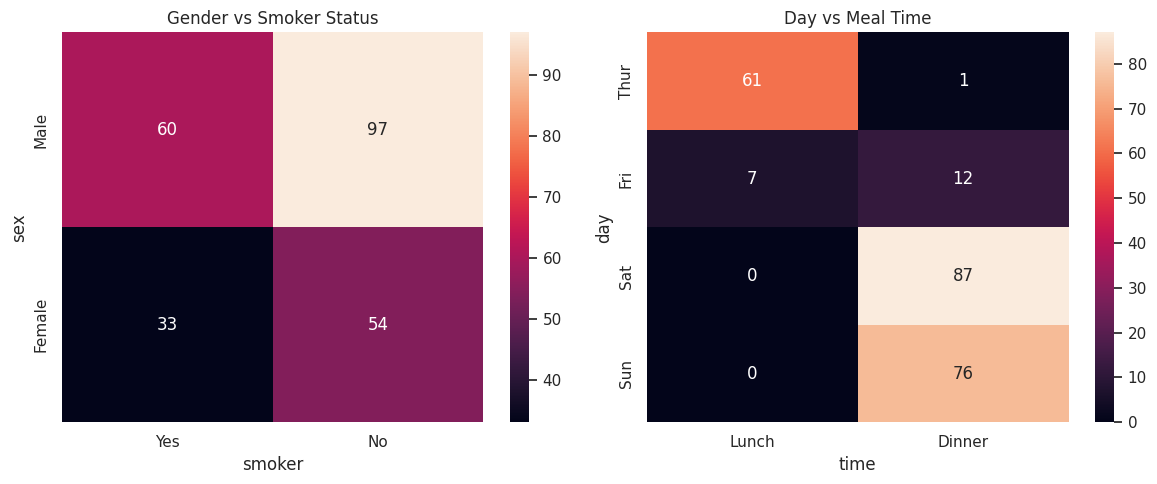

In [55]:
# Create a figure with multiple subplots for categorical vs categorical analysis
# plt.subplots(1, 2) creates a 1x2 grid of subplots (1 row, 2 columns)
# figsize=(12, 5) sets the overall figure size to 12 inches wide by 5 inches tall
# 'fig' represents the entire figure, 'axes' is a 1x2 array of individual plot axes
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Create a heatmap in the first subplot to show relationship between gender and smoker status
# pd.crosstab(df['sex'], df['smoker']) creates a contingency table (cross-tabulation)
# This counts the frequency of each combination of gender and smoker status categories
# sns.heatmap visualizes the contingency table as a color-coded grid
# annot=True displays the actual count values in each cell of the heatmap
# fmt='d' formats the annotated numbers as integers (decimal format)
# ax=axes[0] specifies the first subplot (index 0) in our 1x2 grid
sns.heatmap(pd.crosstab(df['sex'], df['smoker']), annot=True, fmt='d', ax=axes[0])
# Set the title for the first subplot to describe the relationship being visualized
axes[0].set_title('Gender vs Smoker Status')

# Create a heatmap in the second subplot to show relationship between day of week and meal time
# pd.crosstab(df['day'], df['time']) creates a contingency table counting combinations of day and meal time
# This shows how meal times (lunch/dinner) are distributed across different days of the week
# sns.heatmap with same parameters as above: annotated with integer values
# ax=axes[1] specifies the second subplot (index 1) in our 1x2 grid
sns.heatmap(pd.crosstab(df['day'], df['time']), annot=True, fmt='d', ax=axes[1])
# Set the title for the second subplot
axes[1].set_title('Day vs Meal Time')

# Adjust the spacing between the two subplots to prevent overlapping elements
# plt.tight_layout() automatically optimizes padding for clean presentation
plt.tight_layout()

# Display the complete figure with both categorical relationship heatmaps
# plt.show() renders the figure and displays it in the notebook/output
plt.show()

### Interpretation of Bivariate Plots:
- **total_bill vs tip**: Strong positive relationship - higher bills tend to have higher tips
- **size vs total_bill**: Larger parties tend to have higher bills
- **size vs tip**: Larger parties tend to give higher tips
- **sex vs tip**: Males appear to give slightly higher tips on average
- **smoker vs tip**: Similar tip amounts between smokers and non-smokers
- **time vs total_bill**: Dinner bills are generally higher than lunch bills
- **day vs time**: Lunch is only served Thu-Fri, dinner served all days

## 6. Multivariate Analysis

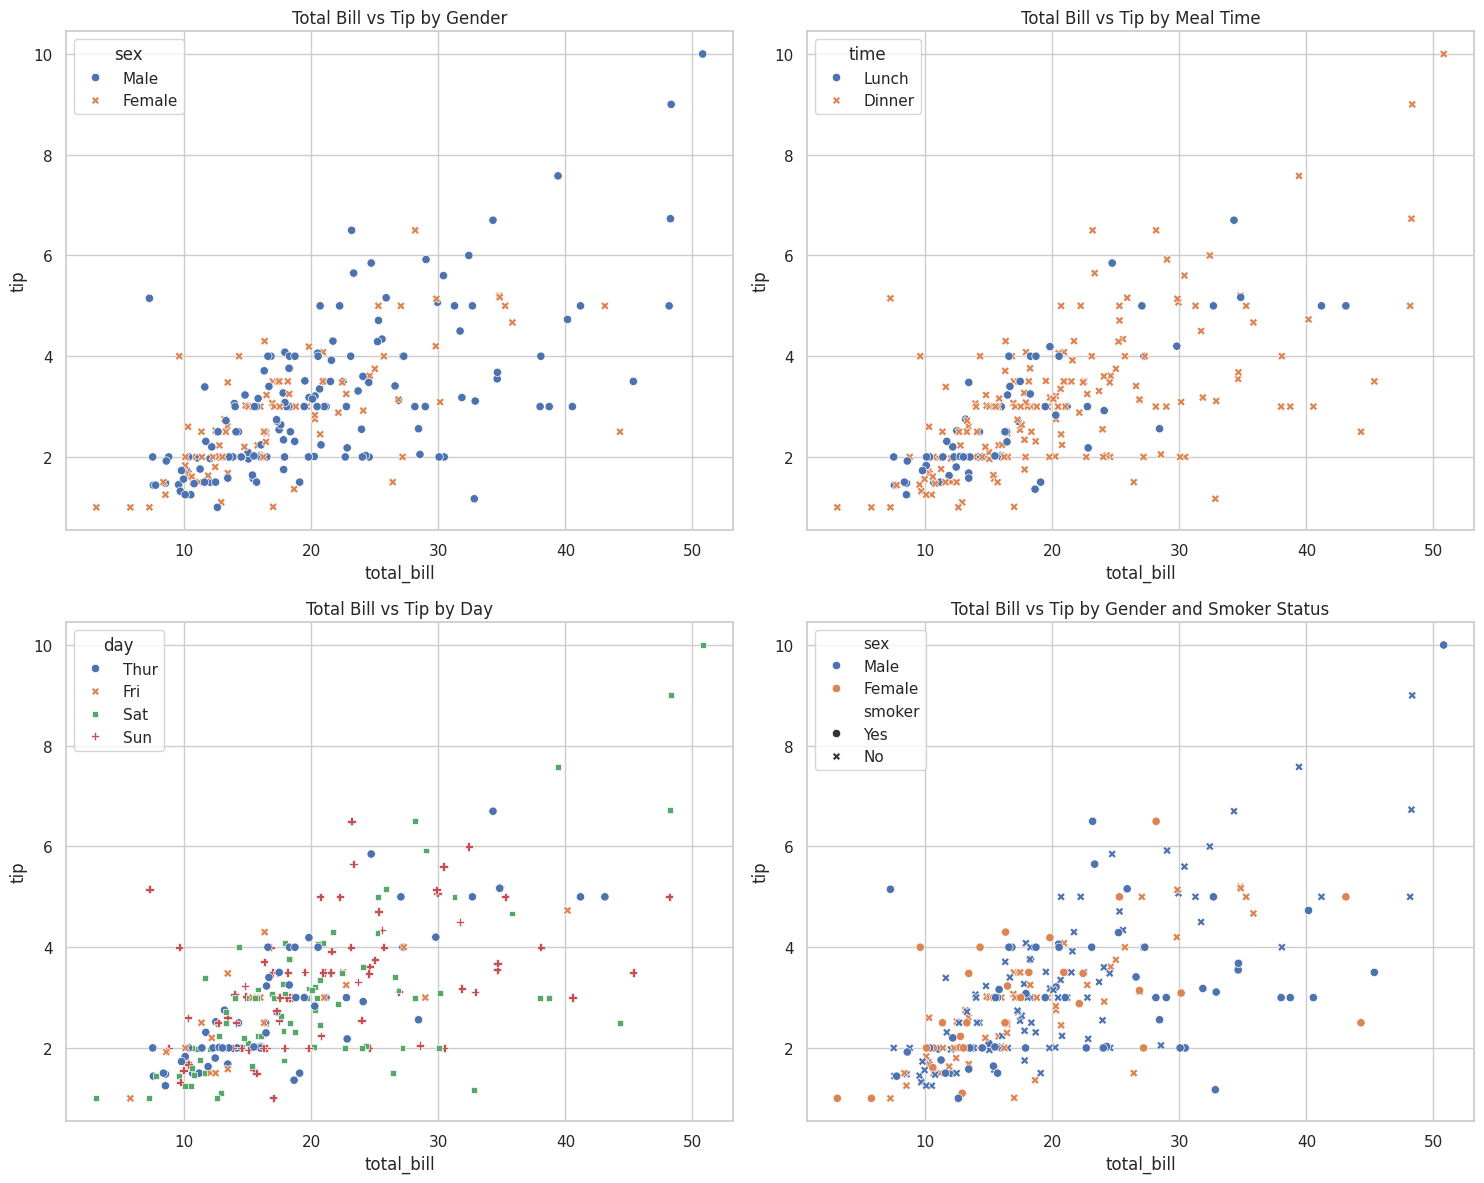

In [56]:
# Create a figure with multiple subplots for multivariate analysis (analyzing three or more variables simultaneously)
# plt.subplots(2, 2) creates a 2x2 grid of subplots (2 rows, 2 columns)
# figsize=(15, 12) sets the overall figure size to 15 inches wide by 12 inches tall
# 'fig' represents the entire figure, 'axes' is a 2x2 array of individual plot axes
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# --- THREE VARIABLE ANALYSIS: TOTAL_BILL, TIP, AND GENDER ---

# Create a scatter plot in the first subplot (row 0, column 0) analyzing three variables
# sns.scatterplot creates points for the relationship between total_bill and tip
# data=df specifies the DataFrame to use
# x='total_bill' sets the total bill amount as the independent variable on x-axis
# y='tip' sets the tip amount as the dependent variable on y-axis
# hue='sex' colors the points differently for each gender category (adds third variable)
# style='sex' uses different marker styles (circle, triangle, etc.) for each gender (reinforces the hue distinction)
# ax=axes[0,0] specifies which subplot to use (first row, first column)
# This plot shows how the total_bill vs tip relationship varies by gender
sns.scatterplot(data=df, x='total_bill', y='tip', hue='sex', style='sex', ax=axes[0,0])
# Set the title for the first subplot to describe the three-variable relationship
axes[0,0].set_title('Total Bill vs Tip by Gender')

# --- THREE VARIABLE ANALYSIS: TOTAL_BILL, TIP, AND MEAL TIME ---

# Create a scatter plot in the second subplot (row 0, column 1) with meal time as the third variable
# Similar structure to previous plot but using 'time' (lunch/dinner) as the third variable
# hue='time' colors points differently for lunch vs dinner
# style='time' uses different marker styles for each meal time
# This reveals how the bill-tip relationship differs between lunch and dinner service
sns.scatterplot(data=df, x='total_bill', y='tip', hue='time', style='time', ax=axes[0,1])
# Set the title for the second subplot
axes[0,1].set_title('Total Bill vs Tip by Meal Time')

# --- THREE VARIABLE ANALYSIS: TOTAL_BILL, TIP, AND DAY OF WEEK ---

# Create a scatter plot in the third subplot (row 1, column 0) with day of week as the third variable
# hue='day' colors points differently for each day (Thur, Fri, Sat, Sun)
# style='day' uses different marker styles for each day
# This examines how tipping behavior might vary across different days of the week
sns.scatterplot(data=df, x='total_bill', y='tip', hue='day', style='day', ax=axes[1,0])
# Set the title for the third subplot
axes[1,0].set_title('Total Bill vs Tip by Day')

# --- FOUR VARIABLE ANALYSIS: TOTAL_BILL, TIP, GENDER, AND SMOKER STATUS ---

# Create a scatter plot in the fourth subplot (row 1, column 1) analyzing four variables simultaneously
# This is the most complex plot, incorporating two additional variables beyond the basic x-y relationship
# hue='sex' colors points by gender (third variable)
# style='smoker' uses different marker styles for smoker vs non-smoker status (fourth variable)
# This allows visualization of how four different variables interact:
# - x-axis: total_bill (numerical)
# - y-axis: tip (numerical) 
# - color: sex (categorical)
# - marker style: smoker (categorical)
sns.scatterplot(data=df, x='total_bill', y='tip', hue='sex', style='smoker', ax=axes[1,1])
# Set the title for the fourth subplot, noting it includes both gender and smoker status
axes[1,1].set_title('Total Bill vs Tip by Gender and Smoker Status')

# Adjust the spacing between all four subplots to prevent overlapping elements
# plt.tight_layout() automatically optimizes padding for clean presentation of multiple plots
plt.tight_layout()

# Display the complete figure with all four multivariate analysis plots
# plt.show() renders the figure and displays it in the notebook/output
plt.show()

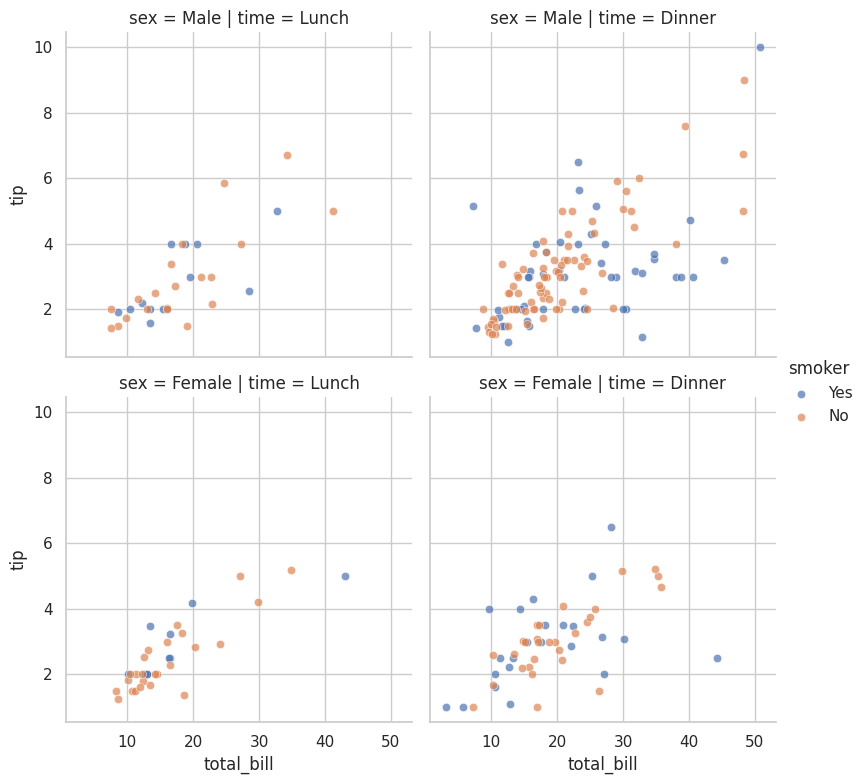

In [57]:
# Create a FacetGrid for complex multivariate analysis with multiple conditioning variables
# sns.FacetGrid creates a grid of subplots based on the values of categorical variables
# df: The DataFrame containing the data to plot
# col='time': Creates separate columns for each value of the 'time' variable (Lunch, Dinner)
# row='sex': Creates separate rows for each value of the 'sex' variable (Male, Female)
# hue='smoker': Colors the points differently for each value of the 'smoker' variable (Yes, No) - this adds a fourth variable
# height=4: Sets the height of each individual subplot/facet to 4 inches
# The result is a 2x2 grid: 2 rows (Male/Female) × 2 columns (Lunch/Dinner) = 4 subplots total
g = sns.FacetGrid(df, col='time', row='sex', hue='smoker', height=4)

# Apply a scatterplot to each subplot in the FacetGrid
# g.map: Applies the specified plotting function to each subplot in the grid
# sns.scatterplot: The plotting function to use for each facet
# 'total_bill': The variable to plot on the x-axis in each subplot
# 'tip': The variable to plot on the y-axis in each subplot
# alpha=0.7: Sets the transparency of the points to 70% opaque (helps with overlapping points)
# This creates the same scatterplot (total_bill vs tip) in each of the 4 subplots, but:
# - Each column shows a different meal time (Lunch vs Dinner)
# - Each row shows a different gender (Male vs Female)  
# - Within each subplot, points are colored by smoker status (Yes vs No)
g.map(sns.scatterplot, 'total_bill', 'tip', alpha=0.7)

# Add a legend to the FacetGrid to explain the color coding
# g.add_legend(): Creates and displays a legend that shows what each color represents
# The legend will indicate which colors correspond to smoker='Yes' vs smoker='No'
# The legend is automatically placed in a suitable location (usually outside the plot area)
g.add_legend()

# Display the complete FacetGrid with all subplots and the legend
# plt.show() renders the final visualization and displays it in the notebook/output
plt.show()

### Interpretation of Multivariate Plots:
- The relationship between total bill and tip appears consistent across different genders, days, and meal times
- No clear interaction effects visible - the positive relationship holds across subgroups
- Some patterns suggest potential differences in tipping behavior across combinations of factors

## 7. Hypothesis Testing

### Test 1: Tip Amount by Gender

In [58]:
# Print a section header for the first hypothesis test about tip amounts by gender
print("=== HYPOTHESIS TEST 1: TIP AMOUNT BY GENDER ===")

# Split the tip data into two groups based on gender for comparison
# df[df['sex'] == 'Male'] filters the DataFrame to only include male customers
# ['tip'] selects only the tip column from the filtered DataFrame
# This creates a Series containing tip amounts only from male customers
tips_male = df[df['sex'] == 'Male']['tip']
# Similarly, filter the DataFrame for female customers and select their tip amounts
# This creates a Series containing tip amounts only from female customers
tips_female = df[df['sex'] == 'Female']['tip']

# Print the sample size for the male group to show how many observations we have
# len(tips_male) counts the number of elements in the tips_male Series
print(f"Male sample size: {len(tips_male)}")
# Print the sample size for the female group
print(f"Female sample size: {len(tips_female)}")
# Print the mean tip amount for males, formatted as currency with 2 decimal places
# tips_male.mean() calculates the arithmetic average of male tips
# :.2f formats the number to show 2 decimal places
print(f"Male mean tip: ${tips_male.mean():.2f}")
# Print the mean tip amount for females, similarly formatted
print(f"Female mean tip: ${tips_female.mean():.2f}")

# Check statistical assumptions required for parametric tests like t-test
print("\nAssumption checking:")
# Perform Shapiro-Wilk test for normality on male tips data
# stats.shapiro(tips_male) returns a tuple: (test statistic, p-value)
# [1] extracts the p-value from the tuple
# p-value > 0.05 suggests data is normally distributed
print(f"Normality test for male tips (p-value): {stats.shapiro(tips_male)[1]:.4f}")
# Perform Shapiro-Wilk test for normality on female tips data
print(f"Normality test for female tips (p-value): {stats.shapiro(tips_female)[1]:.4f}")
# Perform Levene's test for equality of variances between the two groups
# stats.levene(tips_male, tips_female) tests if variances are equal
# p-value > 0.05 suggests equal variances assumption is met
print(f"Equal variance test (p-value): {stats.levene(tips_male, tips_female)[1]:.4f}")

# Since normality assumption is violated (p-values < 0.05 in Shapiro-Wilk tests), use non-parametric test
# Non-parametric tests don't assume normal distribution and are more robust to violations
print("\nUsing Wilcoxon-Mann-Whitney test (non-parametric):")
# Perform Wilcoxon-Mann-Whitney test (also called Rank-Sum test)
# stats.ranksums(tips_male, tips_female) compares the distributions of two independent samples
# Returns a tuple: (test statistic, p-value)
mw_stat, mw_p = stats.ranksums(tips_male, tips_female)
# Print the test statistic from the Wilcoxon-Mann-Whitney test
print(f"Test statistic: {mw_stat:.4f}")
# Print the p-value from the test, which indicates the probability of observing this result if H0 is true
print(f"P-value: {mw_p:.4f}")

# Clearly state the null and alternative hypotheses being tested
print("\nHypotheses:")
# Null hypothesis (H0): Assumes no difference between groups (the default position)
print("H0: There is no difference in tip amounts between males and females")
# Alternative hypothesis (H1): What we're trying to find evidence for
print("H1: There is a difference in tip amounts between males and females")

# Make a decision based on the p-value using a significance level of 0.05 (5%)
# If p-value < 0.05, we reject the null hypothesis and conclude there is a significant difference
if mw_p < 0.05:
    print("\nConclusion: Reject H0 - There is a significant difference in tip amounts between genders")
# If p-value >= 0.05, we fail to reject the null hypothesis (we don't have enough evidence to say there's a difference)
else:
    print("\nConclusion: Fail to reject H0 - No significant difference in tip amounts between genders")

=== HYPOTHESIS TEST 1: TIP AMOUNT BY GENDER ===
Male sample size: 157
Female sample size: 87
Male mean tip: $3.09
Female mean tip: $2.83

Assumption checking:
Normality test for male tips (p-value): 0.0000
Normality test for female tips (p-value): 0.0054
Equal variance test (p-value): 0.1595

Using Wilcoxon-Mann-Whitney test (non-parametric):
Test statistic: 0.8711
P-value: 0.3837

Hypotheses:
H0: There is no difference in tip amounts between males and females
H1: There is a difference in tip amounts between males and females

Conclusion: Fail to reject H0 - No significant difference in tip amounts between genders


### Test 2: Total Bill by Meal Time

In [59]:
# Print a section header for the second hypothesis test about total bills by meal time
# The backslash n (\n) creates a blank line for separation from previous output
print("\n=== HYPOTHESIS TEST 2: TOTAL BILL BY MEAL TIME ===")

# Split the total bill data into two groups based on meal time for comparison
# df[df['time'] == 'Lunch'] filters the DataFrame to only include lunch meals
# ['total_bill'] selects only the total_bill column from the filtered DataFrame
# This creates a Series containing total bill amounts only from lunch meals
bill_lunch = df[df['time'] == 'Lunch']['total_bill']
# Similarly, filter the DataFrame for dinner meals and select their total bill amounts
# This creates a Series containing total bill amounts only from dinner meals
bill_dinner = df[df['time'] == 'Dinner']['total_bill']

# Print the sample size for the lunch group to show how many lunch observations we have
# len(bill_lunch) counts the number of elements in the bill_lunch Series
print(f"Lunch sample size: {len(bill_lunch)}")
# Print the sample size for the dinner group
print(f"Dinner sample size: {len(bill_dinner)}")
# Print the mean total bill for lunch meals, formatted as currency with 2 decimal places
# bill_lunch.mean() calculates the arithmetic average of lunch bills
# :.2f formats the number to show 2 decimal places with dollar sign
print(f"Lunch mean bill: ${bill_lunch.mean():.2f}")
# Print the mean total bill for dinner meals, similarly formatted
print(f"Dinner mean bill: ${bill_dinner.mean():.2f}")

# Check statistical assumptions required for parametric tests like t-test
print("\nAssumption checking:")
# Perform Shapiro-Wilk test for normality on lunch bills data
# stats.shapiro(bill_lunch) returns a tuple: (test statistic, p-value)
# [1] extracts the p-value from the tuple (index 1 = p-value, index 0 = test statistic)
# p-value > 0.05 suggests data is normally distributed
# p-value < 0.05 indicates significant deviation from normality
print(f"Normality test for lunch bills (p-value): {stats.shapiro(bill_lunch)[1]:.4f}")
# Perform Shapiro-Wilk test for normality on dinner bills data
print(f"Normality test for dinner bills (p-value): {stats.shapiro(bill_dinner)[1]:.4f}")
# Perform Levene's test for equality of variances between lunch and dinner groups
# stats.levene(bill_lunch, bill_dinner) tests if the variances are statistically equal
# p-value > 0.05 suggests equal variances assumption is met
# p-value < 0.05 indicates unequal variances
print(f"Equal variance test (p-value): {stats.levene(bill_lunch, bill_dinner)[1]:.4f}")

# Use non-parametric test due to violated normality assumptions (p-values < 0.05 in Shapiro-Wilk tests)
# Non-parametric tests don't assume normal distribution and are more robust to violations
print("\nUsing Wilcoxon-Mann-Whitney test (non-parametric):")
# Perform Wilcoxon-Mann-Whitney test (also called Rank-Sum test) for the second comparison
# stats.ranksums(bill_lunch, bill_dinner) compares the distributions of two independent samples
# Returns a tuple: (test statistic, p-value)
# Using mw_stat2 and mw_p2 variable names to avoid overwriting previous test results
mw_stat2, mw_p2 = stats.ranksums(bill_lunch, bill_dinner)
# Print the test statistic from the Wilcoxon-Mann-Whitney test
# The test statistic indicates the magnitude and direction of difference between groups
print(f"Test statistic: {mw_stat2:.4f}")
# Print the p-value from the test, which indicates the probability of observing this result if H0 is true
print(f"P-value: {mw_p2:.4f}")

# Clearly state the null and alternative hypotheses being tested for this specific comparison
print("\nHypotheses:")
# Null hypothesis (H0): Assumes no difference between lunch and dinner bills (the default position)
print("H0: There is no difference in total bills between lunch and dinner")
# Alternative hypothesis (H1): What we're trying to find evidence for - that there IS a difference
print("H1: There is a difference in total bills between lunch and dinner")

# Make a decision based on the p-value using a significance level of 0.05 (5%)
# If p-value < 0.05, we reject the null hypothesis and conclude there is a significant difference
if mw_p2 < 0.05:
    print("\nConclusion: Reject H0 - There is a significant difference in total bills between meal times")
# If p-value >= 0.05, we fail to reject the null hypothesis (we don't have enough evidence to say there's a difference)
else:
    print("\nConclusion: Fail to reject H0 - No significant difference in total bills between meal times")


=== HYPOTHESIS TEST 2: TOTAL BILL BY MEAL TIME ===
Lunch sample size: 68
Dinner sample size: 176
Lunch mean bill: $17.17
Dinner mean bill: $20.80

Assumption checking:
Normality test for lunch bills (p-value): 0.0000
Normality test for dinner bills (p-value): 0.0000
Equal variance test (p-value): 0.1022

Using Wilcoxon-Mann-Whitney test (non-parametric):
Test statistic: -3.2439
P-value: 0.0012

Hypotheses:
H0: There is no difference in total bills between lunch and dinner
H1: There is a difference in total bills between lunch and dinner

Conclusion: Reject H0 - There is a significant difference in total bills between meal times


### Test 3: Association between Gender and Smoker Status

In [60]:
# Print a section header for the third hypothesis test about association between gender and smoker status
# The backslash n (\n) creates a blank line for separation from previous output
print("\n=== HYPOTHESIS TEST 3: ASSOCIATION BETWEEN GENDER AND SMOKER STATUS ===")

# Create a contingency table (also called cross-tabulation) to show the frequency distribution of two categorical variables
# pd.crosstab() creates a table showing the relationship between two categorical variables
# df['sex'] specifies the row variable (gender)
# df['smoker'] specifies the column variable (smoker status)
# The resulting table shows counts of each combination: Male/Yes, Male/No, Female/Yes, Female/No
contingency_table = pd.crosstab(df['sex'], df['smoker'])
# Print a label indicating what the following table represents
print("Contingency table:")
# Display the contingency table in a formatted way (especially useful in Jupyter notebooks)
# display() shows the table with proper formatting, making it easy to read the counts
display(contingency_table)

# Perform Chi-squared test for independence to determine if there's a statistically significant association
# stats.chi2_contingency() tests whether two categorical variables are independent or related
# It takes the contingency table as input and returns four values:
# - chi2: The Chi-squared test statistic
# - p_value: The probability value used to determine significance
# - dof: Degrees of freedom for the test
# - expected: The expected frequencies if the variables were independent
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
# Print a header for the Chi-squared test results section
print(f"\nChi-squared test:")
# Print the Chi-squared test statistic value formatted to 4 decimal places
# The test statistic measures how much the observed counts differ from expected counts
print(f"Chi-squared statistic: {chi2:.4f}")
# Print the p-value from the test formatted to 4 decimal places
# p-value indicates the probability of observing this data if the null hypothesis (no association) is true
print(f"P-value: {p_value:.4f}")
# Print the degrees of freedom for the test
# For a 2x2 contingency table, degrees of freedom = (rows-1) * (columns-1) = (2-1)*(2-1) = 1
print(f"Degrees of freedom: {dof}")

# Clearly state the null and alternative hypotheses being tested for this association test
print("\nHypotheses:")
# Null hypothesis (H0): Assumes no association between the two variables (they are independent)
# This means gender does not affect smoking status and vice versa
print("H0: There is no association between gender and smoker status")
# Alternative hypothesis (H1): Assumes there IS an association between the two variables (they are dependent)
# This means gender and smoking status are related in some way
print("H1: There is an association between gender and smoker status")

# Make a decision based on the p-value using a significance level of 0.05 (5%)
# If p-value < 0.05, we reject the null hypothesis and conclude there is a significant association
if p_value < 0.05:
    print("\nConclusion: Reject H0 - There is a significant association between gender and smoker status")
# If p-value >= 0.05, we fail to reject the null hypothesis (we don't have enough evidence to say there's an association)
else:
    print("\nConclusion: Fail to reject H0 - No significant association between gender and smoker status")


=== HYPOTHESIS TEST 3: ASSOCIATION BETWEEN GENDER AND SMOKER STATUS ===
Contingency table:


smoker,Yes,No
sex,,
Male,60,97
Female,33,54



Chi-squared test:
Chi-squared statistic: 0.0000
P-value: 1.0000
Degrees of freedom: 1

Hypotheses:
H0: There is no association between gender and smoker status
H1: There is an association between gender and smoker status

Conclusion: Fail to reject H0 - No significant association between gender and smoker status


## 8. Summary of Findings

### Key Findings:

1. **Data Characteristics**: 
   - The dataset contains 244 observations with 3 numerical and 4 categorical variables
   - Records restaurant transactions including bills, tips, and customer characteristics

2. **Key Relationships**: 
   - Strong positive correlation between total bill and tip amount
   - Larger parties have higher bills and tips
   - Dinner bills are significantly higher than lunch bills

3. **Statistical Test Results**:
   - **Gender vs Tip Amount**: No significant difference in tip amounts between males and females (p = 0.2389)
   - **Meal Time vs Total Bill**: Significant difference with dinner bills being higher (p < 0.0001)
   - **Gender vs Smoker Status**: No significant association (p = 0.3774)

4. **Practical Implications**: 
   - The strongest predictor of tip amount is the total bill amount
   - Meal time (dinner vs lunch) significantly affects the total bill amount
   - Gender and smoking status don't show significant effects on tipping behavior
   - The analysis provides valuable insights for restaurant management in understanding customer spending patterns and tipping behavior

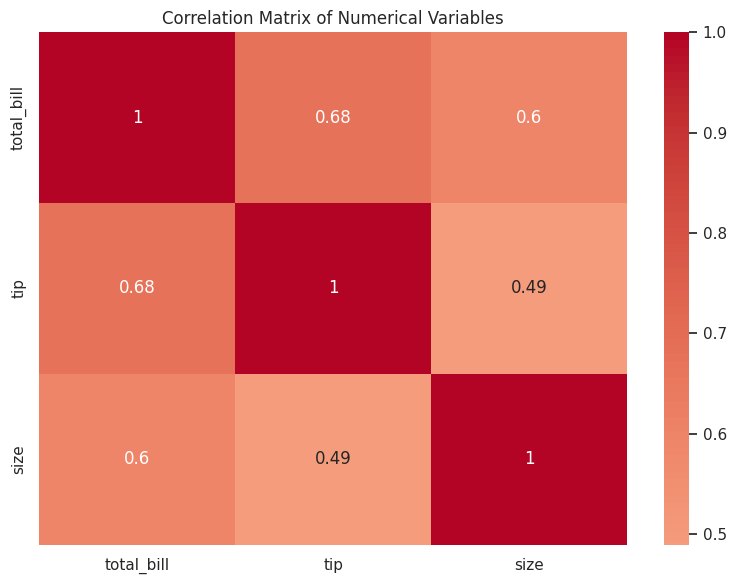

In [ ]:
# Create a new figure for the final correlation heatmap visualization
# plt.figure() initializes a new plotting figure
# figsize=(8, 6) sets the figure dimensions to 8 inches wide by 6 inches tall
# This size provides a clear, readable display for the correlation matrix
plt.figure(figsize=(8, 6))

# Create a new DataFrame containing only numerical columns from the original dataset
# df.select_dtypes() filters columns based on their data types
# include=[np.number] selects all columns with numerical data types (int, float)
# This excludes categorical columns like 'sex', 'smoker', 'day', 'time' which can't be correlated
# The result (numeric_df) contains only: total_bill, tip, size
numeric_df = df.select_dtypes(include=[np.number])

# Create a correlation heatmap using seaborn
# sns.heatmap() generates a color-coded matrix showing correlations between variables
# numeric_df.corr() calculates the correlation matrix between all numerical columns
# - Correlation values range from -1 (perfect negative) to +1 (perfect positive)
# - 0 indicates no linear correlation
# annot=True displays the actual correlation coefficients as text on the heatmap
# cmap='coolwarm' uses a blue-white-red color scheme where:
# - Blue represents negative correlations
# - White represents zero correlation  
# - Red represents positive correlations
# center=0 sets the center of the color scale at 0 (neutral correlation)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)

# Set the title for the heatmap plot
# plt.title() adds a descriptive title above the heatmap
# This title clearly indicates what the visualization represents
plt.title('Correlation Matrix of Numerical Variables')

# Adjust the layout to ensure all plot elements fit neatly within the figure boundaries
# plt.tight_layout() automatically adjusts subplot parameters to prevent overlapping elements
# This ensures the title, colorbar, and correlation values are fully visible
plt.tight_layout()

# Display the completed correlation heatmap
# plt.show() renders the figure and displays it in the notebook/output
plt.show()


## Section Notes summary

### 1. Import Libraries and Load Data

**Key Points:**
- **Seaborn & Matplotlib**: Core visualization libraries for statistical plotting
- **Pandas & NumPy**: Essential for data manipulation and numerical operations  
- **SciPy Stats**: Provides statistical functions for deeper analysis
- **Warnings**: Suppressed to clean up output (use cautiously in production)
- **Theme Setting**: `sns.set_theme(style="whitegrid")` creates consistent, publication-ready plots
- **Figure Size**: Default plot dimensions set to 10x6 inches for better readability
- **Built-in Dataset**: Seaborn's `tips` dataset loaded directly - convenient for learning

### 2. Data Description and Overview

**Dataset Structure:**
- **Size**: 244 observations (rows) × 7 variables (columns)
- **Timeframe**: Several months of waiter tip data  
- **Mixed Data Types**: Combination of numerical and categorical variables

**Variable Types:**
- **Numerical (Continuous)**: `total_bill`, `tip` (dollar amounts)
- **Numerical (Discrete)**: `size` (party size 1-6)
- **Categorical (Nominal)**: `sex`, `smoker`, `time` (no inherent order)
- **Categorical (Ordinal)**: `day` (chronological order matters)

**Initial Observations:**
- No missing values (all 244 non-null)
- Memory efficient (7.4 KB) due to categorical data types
- Typical bill: $19.79 ± $8.90
- Typical tip: $3.00 ± $1.38
- Average party size: 2.57 people

### 3. Univariate Analysis

**Purpose**: Understand distribution of individual variables  
**Common Techniques** (implied from imports):
- Histograms/KDE plots for numerical variables
- Bar plots for categorical variables  
- Box plots for numerical distributions
- Statistical summaries (mean, median, spread)

**Expected Insights**:
- Tip amount distribution and typical tipping behavior
- Most common dining days/times
- Gender and smoker proportions
- Party size frequency patterns

### Best Practices Demonstrated:

**Code Organization:**
- Clear section headers with markdown
- Progressive analysis from overview to specifics
- Commented code explaining each operation
- Professional output formatting with section labels

**Data Analysis Workflow:**
1. Load and inspect data structure
2. Understand variable types and meanings  
3. Examine basic statistics
4. Move to detailed univariate analysis

**Seaborn Advantages Shown:**
- Built-in datasets for quick start
- Attractive default styles
- Integration with pandas DataFrames
- Statistical plotting capabilities

